<a href="https://colab.research.google.com/github/CalebEng/Ai-Project-learning/blob/master/Ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import torch
import torch.nn as nn
from torch.nn import functional as F
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras


!pip install pyyaml h5py
import numpy as np


!pip install --upgrade tiktoken
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Ai work')
#torch.__version__
enc = tiktoken.encoding_for_model('gpt-3.5-turbo')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00
Mounted at /content/drive



------------------- Prep and loading data sets -------------------

--ONLY RUN THE NEXT IF CSV FILE CONTAINING CONVOS HAS A INDEX COLUMN--

In [ ]:
import pandas as pd
df = pd.read_csv('poems.csv')
# If you know the name of the column skip this
first_column = df.columns[0]
sec_col = df.columns[2]
trd_col = df.columns[3]
four_col = df.columns[4]

# Delete first
df = df.drop([first_column], axis=1)
df = df.drop([sec_col],axis=1)
df = df.drop([trd_col],axis = 1)
df = df.drop([four_col],axis = 1)


df.to_csv('poem.csv',index = False)


In [ ]:
df.to_csv('poems.csv',index=False)

NameError: ignored

In [ ]:
df = pd.read_csv('poem.csv')

In [ ]:
stdf = df['content'].tolist()
print(len(stdf))

573


In [ ]:

df2 = pd.read_csv('Conversation.csv')

questions = df2['question'].tolist()
answers = df2['answer'].tolist()

temp = map(format, questions)
temp2 = map(format, answers)

questions = list(temp)
answers = list(temp2)


--EXIT--

In [87]:
f = open("SongsAndPoems.txt")
dat = f.read()

In [88]:
dat

'Deep in the darkest part of your heart\nEvery beat seems to be a trying slow start\nPride and victory have no place here\nReasonable thoughts are placed on the back burner\nEvery breath  difficult and heavy\nSeasons all remain the same, cold, dark and gloomy\nStereotypical behaviour is quite apparent\nIn the quiet darkness you reside\nOn a deep running  slow train\nNever, yes it never seems like you’ll come back again\nA little soul scarce fledged for earth\nTakes wing with heaven again for goal\nEven while we hailed as fresh from birth\nA little soul.\nOur thoughts ring sad as bells that toll,\nNot knowing beyond this blind world\'s girth\nWhat things are writ in heaven\'s full scroll.\nOur fruitfulness is there but dearth,\nAnd all things held in time\'s control\nSeem there, perchance, ill dreams, not worth\nA little soul.\nThe little feet that never trod\nEarth, never strayed in field or street,\nWhat hand leads upward back to God\nThe little feet?\nA rose in June\'s most honied he

Dont use


In [ ]:
poems=""
for i in stdf[:200]:
  poems+=i
  poems+="\n"
poems=poems[:-1]

print(poems)

--Padding and turning data into tensors--

In [ ]:
df = pd.read_csv('Conversation.csv')

temp1 = df['question'].tolist()
temp2 = df['answer'].tolist()

def format(x):
  y=enc.encode(x)
  return y

qT = list(map(format, temp1))
aT = list(map(format, temp2))

for i in range(0,len(qT)):
  if len(qT[i])<25:
    while len(qT[i])<25:
      qT[i].append(482)


for i in range(0,len(aT)):
  if len(aT[i])<25:
    while len(aT[i])<25:
      aT[i].append(482)

lists = [qT,aT]
data = [val for tup in zip(*lists) for val in tup]







use


In [91]:
tokenizer = Tokenizer()
corpus = dat.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1



In [92]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [94]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))



In [95]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [96]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


For training a new model

In [99]:
model = Sequential()

model.add(Embedding(total_words,240,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs,ys,epochs=200, verbose = 1)

print(model)

Epoch 1/200
236/236 [==============================] - 19s 61ms/step - loss: 6.1402 - accuracy: 0.0720
Epoch 2/200
236/236 [==============================] - 3s 14ms/step - loss: 4.8116 - accuracy: 0.1854
Epoch 3/200
236/236 [==============================] - 2s 10ms/step - loss: 3.6801 - accuracy: 0.2953
Epoch 4/200
236/236 [==============================] - 2s 9ms/step - loss: 2.7455 - accuracy: 0.4057
Epoch 5/200
236/236 [==============================] - 2s 10ms/step - loss: 2.0312 - accuracy: 0.5291
Epoch 6/200
236/236 [==============================] - 2s 10ms/step - loss: 1.5486 - accuracy: 0.6326
Epoch 7/200
236/236 [==============================] - 4s 16ms/step - loss: 1.2578 - accuracy: 0.6951
Epoch 8/200
236/236 [==============================] - 2s 10ms/step - loss: 1.0604 - accuracy: 0.7379
Epoch 9/200
236/236 [==============================] - 2s 8ms/step - loss: 0.9320 - accuracy: 0.7695
Epoch 10/200
236/236 [==============================] - 2s 9ms/step - loss: 0.8525 

For adding more data to a pre existing model WIP

In [86]:
from keras.models import load_model
model = load_model('poet.keras')

print(model)
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs,ys,epochs=100, verbose = 1)


Epoch 1/100


ValueError: ignored

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 240)           328560    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              469200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1369)              412069    
                                                                 
 dense_4 (Dense)             (None, 595)               815150    
                                                                 
Total params: 2,024,979
Trainable params: 2,024,979
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 17, 240)           378480    
                                                                 
 bidirectional_6 (Bidirectio  (None, 300)              469200    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1577)              474677    
                                                                 
Total params: 1,322,357
Trainable params: 1,322,357
Non-trainable params: 0
_________________________________________________________________


Show accuracy

In [101]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

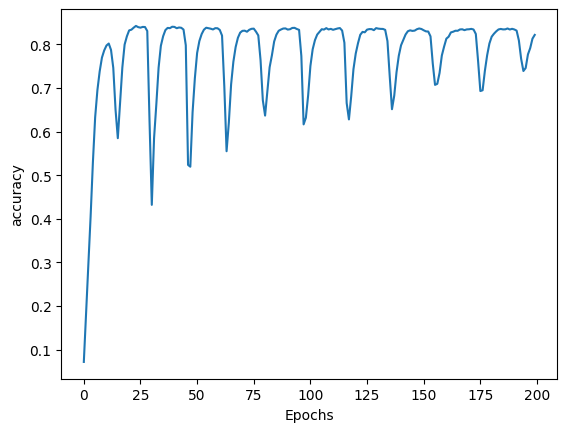

In [102]:
plot_graphs(history, 'accuracy')

In [107]:
model.save('poet.keras')

In [118]:
seed_text = "Blinding lights"
temp = ""
next_words = 20

for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    temp+=f" {word}"
    if index == predicted:
      output_word = word
      break
  seed_text += f" {output_word}"


print(len(seed_text))

1/1 [==============================] - 0s 20ms/step
113


In [119]:
seed_text+="\n~Silverlight"

In [17]:
seed_text
temp

" and the i to you a of in that my all me but so for we is it 'cause this i'm like with was lost be not when just what know her on don't no are as up been hope love how need life down time now if it's you're from who i've away little than out world your there say eyes through at were more she still think here back never or let these one they feel can't nothing our where had want said i'll yeah heart feet death tears then make do words better can even many much long could things sweet their he him upon good find gold always go get years every have place dark god light his ever thing heard see another did hard ain't forget mean let's live future earth dreams few thought would stay whose lips o days over day mind break keep wanna wanted we'll coal seems slow train soul hands why by us too an thy great before will way guess maybe take right hearing white doesn't blues those come heaven sad soft has them caught knew angel own shame song hair hold old ah only wrong past really swear we're oh

In [120]:
print(seed_text)

Blinding lights to me what you're thinking away get back here and breaking in the shalt here of the days and dead
~Silverlight


Break


In [ ]:
n = int(0.9*len(tenData))

train_data = tenData[:n]

val_data = tenData[n:]


In [ ]:
block_size = 8


In [ ]:
x = train_data[:block_size]


for t in range(block_size):
  context = x[:t+1]
  target = x[t]
  print(f"when input is {context} \nthe target is: {target}")

when input is tensor([10267]) 
the target is: 10267
when input is tensor([10267,   279]) 
the target is: 279
when input is tensor([10267,   279, 12224]) 
the target is: 12224
when input is tensor([10267,   279, 12224,   315]) 
the target is: 315
when input is tensor([10267,   279, 12224,   315, 29740]) 
the target is: 29740
when input is tensor([10267,   279, 12224,   315, 29740,  5086]) 
the target is: 5086
when input is tensor([10267,   279, 12224,   315, 29740,  5086, 11203]) 
the target is: 11203
when input is tensor([10267,   279, 12224,   315, 29740,  5086, 11203,   319]) 
the target is: 319


In [ ]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[ 3805,   319, 59522, 27027,  1901, 97353, 20962,  1550],
        [  361,  8617,   430,  2316,   656,   339,   834, 35563],
        [  389,  1077,  1093,   264, 59380,  3304,  2675,  1518],
        [ 2967,   347,    11,   779,   606,   439,   872, 17457]])
targets:
torch.Size([4, 8])
tensor([[  319, 59522, 27027,  1901, 97353, 20962,  1550, 57150],
        [ 8617,   430,  2316,   656,   339,   834, 35563,  1909],
        [ 1077,  1093,   264, 59380,  3304,  2675,  1518,   279],
        [  347,    11,   779,   606,   439,   872, 17457,   409]])
----
when input is [3805] the target: 319
when input is [3805, 319] the target: 59522
when input is [3805, 319, 59522] the target: 27027
when input is [3805, 319, 59522, 27027] the target: 1901
when input is [3805, 319, 59522, 27027, 1901] the target: 97353
when input is [3805, 319, 59522, 27027, 1901, 97353] the target: 20962
when input is [3805, 319, 59522, 27027, 1901, 97353, 20962] the target: 1550
when inpu

In [ ]:
print(xb) # our input to the transformer

tensor([[ 3805,   319, 59522, 27027,  1901, 97353, 20962,  1550],
        [  361,  8617,   430,  2316,   656,   339,   834, 35563],
        [  389,  1077,  1093,   264, 59380,  3304,  2675,  1518],
        [ 2967,   347,    11,   779,   606,   439,   872, 17457]])


**MODEL** **TIME**

In [ ]:
class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()

        # embedding layer contains embeddings for each word
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # linear layers to extract patterns from the corpus
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [ ]:
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)
for epoch in range(10):
    total_loss = 0
    for context, target in trigrams:
        context_idxs = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_idx[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)

IndexError: ignored